# Gold Price Prediction Project

### • Introduction
---
Gold has been one of the most valuable and sought-after precious metals for centuries, symbolizing wealth, stability, and prosperity. It plays a crucial role in the global economy as both a commodity and an investment asset. The price of gold is highly volatile and influenced by several factors, including global economic conditions, inflation rates, currency fluctuations, and geopolitical tensions. Investors often consider gold a safe-haven asset, especially during times of economic uncertainty or financial crises. In modern financial markets, gold prices are closely linked to other indicators such as stock market performance, crude oil prices, and exchange rates. Predicting gold prices accurately is challenging due to their complex relationship with these variables. With advancements in data science and machine learning, it has become possible to analyze large datasets and develop models to forecast future gold prices. This prediction is valuable for investors, policymakers, and businesses to make informed financial decisions.

<img src='gold_photo.jpeg' style='width:1000px;height:350px'/>

### • Importing Required Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf  # for importing data from yahoo finance
import warnings
warnings.filterwarnings('ignore')

### • Load the Dataset from the Yahoo Finance

In [6]:
tickers = ['^GSPC', 'GLD', 'USO', 'SLV', 'EURUSD=X']

# Works for all versions of yfinance
yf.set_tz_cache_location(None) 
df = yf.download(tickers, start='2008-01-01', end='2025-11-01', auto_adjust=True)['Close']

df = df.reset_index()
df.columns = ['Date', 'EUR/USD', 'GLD', 'SLV', 'USO', 'SPX']

[*********************100%***********************]  5 of 5 completed


### • Checking Dataset

In [8]:
df.head()

,Date,EUR/USD,GLD,SLV,USO,SPX
0,2008-01-01,1.462010,NaN,NaN,NaN,NaN
1,2008-01-02,1.471692,84.860001,15.180,627.760010,1447.160034
2,2008-01-03,1.474491,85.570000,15.285,626.960022,1447.160034
3,2008-01-04,1.475492,85.129997,15.167,618.479980,1411.630005
4,2008-01-07,1.468299,84.769997,15.053,604.000000,1416.180054


In [10]:
df.tail()

,Date,EUR/USD,GLD,SLV,USO,SPX
4647,2025-10-27,1.163169,367.010010,42.400002,73.120003,6875.160156
4648,2025-10-28,1.165175,364.380005,42.700001,71.389999,6890.890137
4649,2025-10-29,1.165787,363.000000,43.230000,71.800003,6890.589844
4650,2025-10-30,1.160335,370.130005,44.340000,71.709999,6822.339844
4651,2025-10-31,1.157247,368.119995,44.009998,72.559998,6840.200195


From above code, We display the **First 5 Rows** from the Dataset.

In [11]:
df.sample(8)

,Date,EUR/USD,GLD,SLV,USO,SPX
1000,2011-11-01,1.386001,167.380005,32.330002,281.600006,1218.280029
1151,2012-05-30,1.247816,151.910004,27.120001,264.160004,1313.319946
2635,2018-02-06,1.236782,125.379997,15.650000,101.599998,2695.139893
714,2010-09-27,1.347909,126.720001,20.990000,265.920013,1142.160034
3103,2019-11-22,1.106586,137.740005,15.900000,96.879997,3110.290039
3871,2022-11-02,0.987791,152.389999,17.730000,74.080002,3759.689941
709,2010-09-20,1.304393,124.870003,20.290001,265.760010,1142.709961
3383,2020-12-18,1.226272,176.440002,23.959999,33.480000,3709.409912


Above code is usually used for Seeing **Random 8 Rows** from the Dataset.

#### Here’s explanation of each column:
---
- **Date:** The date of the trading data (MM/DD/YYYY format).

- **SPX:** S&P 500 Index showing stock market performance, usually inversely related to gold.
- **GLD:** Gold price (target variable) representing the value of gold at that time. (Unit is US Dollar per share)
- **USO:** Crude oil prices, influencing inflation and indirectly affecting gold prices. (Unit is US Dollar per share)
- **SLV:** Silver price, which often moves in the same direction as gold. (Unit is US Dollar per share)
- **EUR/USD:** Euro to U.S. Dollar exchange rate, where a weaker USD generally increases gold prices. (Unit is Ratio)

### • Basic Information about Dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4652 entries, 0 to 4651
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4652 non-null   datetime64[ns]
 1   EUR/USD  4627 non-null   float64       
 2   GLD      4488 non-null   float64       
 3   SLV      4488 non-null   float64       
 4   USO      4488 non-null   float64       
 5   SPX      4488 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 218.2 KB


The dataset is a Pandas DataFrame containing **4,652 rows** and **6 columns**. It includes a Date column with datetime values and five numerical columns—SPX, GLD, USO, SLV, and EUR/USD—each representing financial indicators or asset prices. While the Date column is complete with no missing values, the remaining columns have a few missing entries, with SPX having **4,627 non-null values** and the others **4,488**. All numeric columns are of float64 data type, and the dataset occupies approximately **218.2 KB** of memory. Overall, it provides a comprehensive record of daily financial data for multiple assets and exchange rates across several years.

In [13]:
# df.to_csv('gold_price_dataset.csv')

From the above code, We save the data as csv. 

In [14]:
df.describe()

,Date,EUR/USD,GLD,SLV,USO,SPX
count,4652,4627.000000,4488.000000,4488.000000,4488.000000,4488.000000
mean,2016-11-29 09:46:16.612209920,1.213334,147.691753,20.740506,180.511444,2700.414603
min,2008-01-01 00:00:00,0.959619,70.000000,8.850000,17.040001,676.530029
25%,2012-06-14 18:00:00,1.103024,117.120003,15.790000,74.537500,1394.485016
50%,2016-11-29 12:00:00,1.174122,132.750000,18.760000,100.040001,2202.329956
75%,2021-05-14 18:00:00,1.320638,168.939995,24.232500,279.600006,3855.802490
max,2025-10-31 00:00:00,1.598798,403.149994,49.169998,939.840027,6890.890137
std,NaN,0.134679,49.052010,6.735281,156.172560,1480.592479


The dataset contains financial data from **January 1, 2008**, to **October 31, 2025**, covering a wide time span of over **17 years**. The mean date of the dataset is around November 29, 2016, indicating that the data is evenly distributed across this period. The **SPX values** range from **0.9596 to 1.5988**, with an average of **1.2133**, showing moderate variation as reflected by its **standard deviation of 0.1347**. The **GLD** column, representing gold prices, ranges between **70.00 and 403.15**, with an **average of 147.69**, indicating significant price growth over time. Similarly, **USO (crude oil) varies between 8.85 and 49.17**, with a **mean of 20.74**, showing high volatility. The SLV column, representing silver, also demonstrates substantial variability with prices ranging from **17.04 to 939.84**. Lastly, the EUR/USD exchange rate fluctuates widely between **676.53 and 6890.89**, with a large **standard deviation of 1480.59**, reflecting considerable currency market movement across the years.

In [16]:
print("Total Rows:",df.shape[0], "|", "Total Columns:", df.shape[1])

Total Rows: 4652 | Total Columns: 6


### • Handling Missing values & Duplicate values

In [17]:
# Check for missing values
df.isnull().sum()

Date         0
EUR/USD     25
GLD        164
SLV        164
USO        164
SPX        164
dtype: int64

From the output, we can conclude that the **Date column** has **no missing values**, meaning all records have valid dates. However, the **SPX column contains 25 missing values**, while the **GLD, USO, SLV, and EUR/USD columns each have 164 missing values**. This indicates that a small portion of the dataset has incomplete financial data, particularly for the asset and currency columns, which may need to be handled through imputation or removal before analysis.

In [18]:
# Calculate percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display result
missing_percentage

Date       0.000000
EUR/USD    0.537403
GLD        3.525365
SLV        3.525365
USO        3.525365
SPX        3.525365
dtype: float64

Only a very small fraction of the data is missing — approximately **0.54% for SPX** and around **3.52% for GLD, USO, SLV, and EUR/USD**, while the Date column is complete. This indicates that the dataset is generally clean, and since the percentage of missing values is quite low, these rows can be safely dropped without significantly affecting the analysis.

In [19]:
# Drop rows with missing values
df = df.dropna()

# Check the new shape of the dataset
print("After dropping missing values:")
df.shape

After dropping missing values:


(4463, 6)

In [20]:
# Check for duplicates
duplicates_exist = df.duplicated().any()
print("Are there any duplicates?", duplicates_exist)

Are there any duplicates? False


Since the Dataset contains **No missing (null) values** and **No duplicate entries**, it indicates that the Data is **clean**, **reliable**, and ready for further analysis. Therefore, We can proceed to the **Data Visualization** phase to explore patterns, trends, and insights.

### • Data Visualization

<h3> On which time period gold price increases and decreases...</h3>

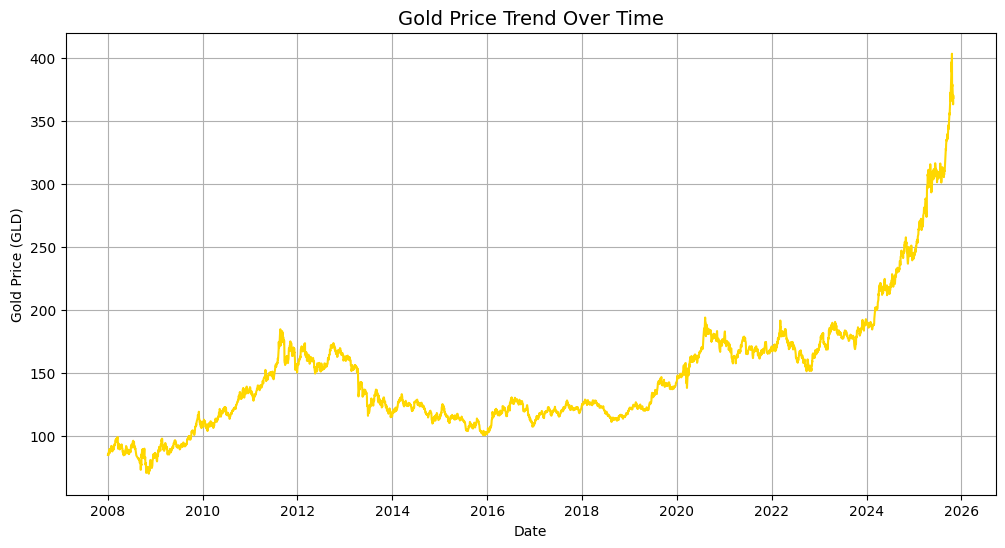

In [21]:
# Line Chart for Gold Price over Date
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['GLD'], color='gold')
plt.title('Gold Price Trend Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Gold Price (GLD)')
plt.grid(True)
plt.show()

The graph titled **"Gold Price Trend Over Time"** shows the variation in gold prices (GLD) from 2008 to 2025. The trend indicates that gold prices experienced significant fluctuations over the years. From 2008 to around 2012, there was a steady increase, followed by a noticeable decline until around 2016. After 2018, the prices began to rise again, showing a strong upward momentum, particularly from 2020 onwards. The steep surge in prices after 2023 suggests a sharp growth phase, possibly due to economic uncertainties or inflationary pressures. Overall, the graph highlights a long-term bullish trend in gold prices with short-term corrections.

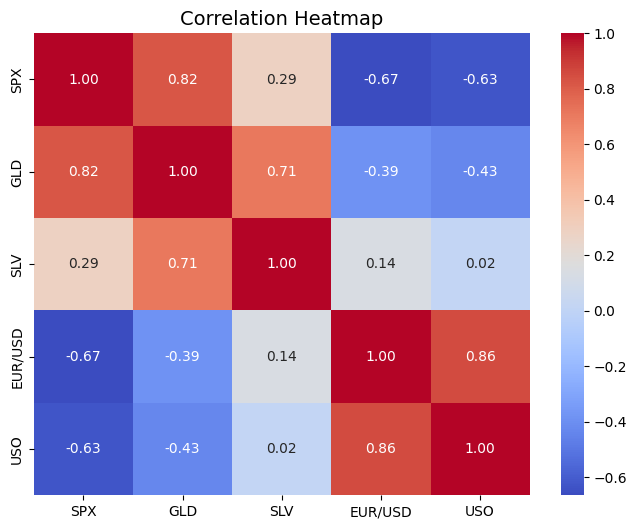

In [22]:
# Correlation Heatmap
x=df[['SPX', 'GLD', 'SLV','EUR/USD','USO']]
# y=drop.df['Date']
plt.figure(figsize=(8,6))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

The **Correlation Heatmap** shows the relationships between SPX, GLD, SLV, EUR/USD, and USO. From the heatmap, we can see that **SPX and SLV** have a **strong positive correlation (0.86)**, indicating they tend to move in the same direction. GLD (gold) shows a strong positive correlation with **EUR/USD (0.82)** and **USO (0.71)**, suggesting that gold prices often rise when the euro strengthens or oil prices increase. In contrast, **SPX and EUR/USD** have a strong negative correlation **(-0.67)**, implying that when the stock market index rises, the euro tends to weaken. Similarly, GLD has a moderate negative correlation with **SPX (-0.39)** and **SLV (-0.43)**. Overall, the heatmap highlights that gold and silver prices are more closely related to currency and commodity movements than to stock index trends.

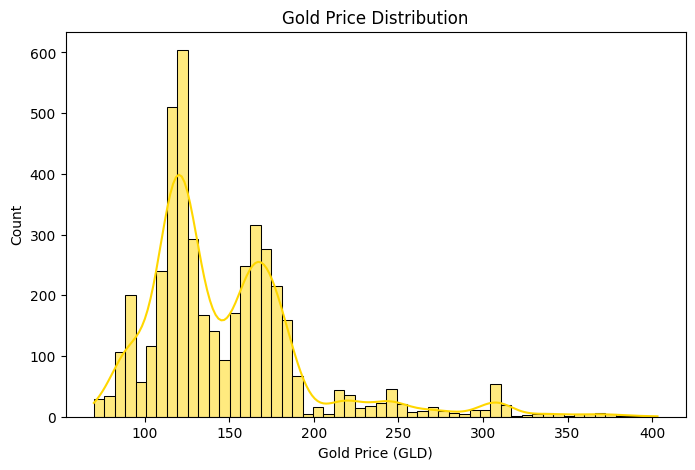

In [23]:
# Distribution plot of Gold Price
plt.figure(figsize=(8,5))
sns.histplot(df['GLD'], kde=True, color='gold')
plt.title('Gold Price Distribution')
plt.xlabel('Gold Price (GLD)')
plt.show()

The **Gold Price Distribution** graph shows the frequency of gold prices (GLD) over the observed period. The distribution is **right-skewed**, indicating that most gold prices are concentrated in the lower range, primarily between **100 and 180**, with fewer occurrences of higher prices above **200**. The histogram has two noticeable peaks, suggesting a **bimodal distribution**, which may represent two different market phases—one during stable years and another during periods of price surge. The long right tail indicates occasional high-price spikes, reflecting times of economic uncertainty or increased market demand. Overall, gold prices have generally remained within a moderate range but have shown significant upward movements in certain periods.

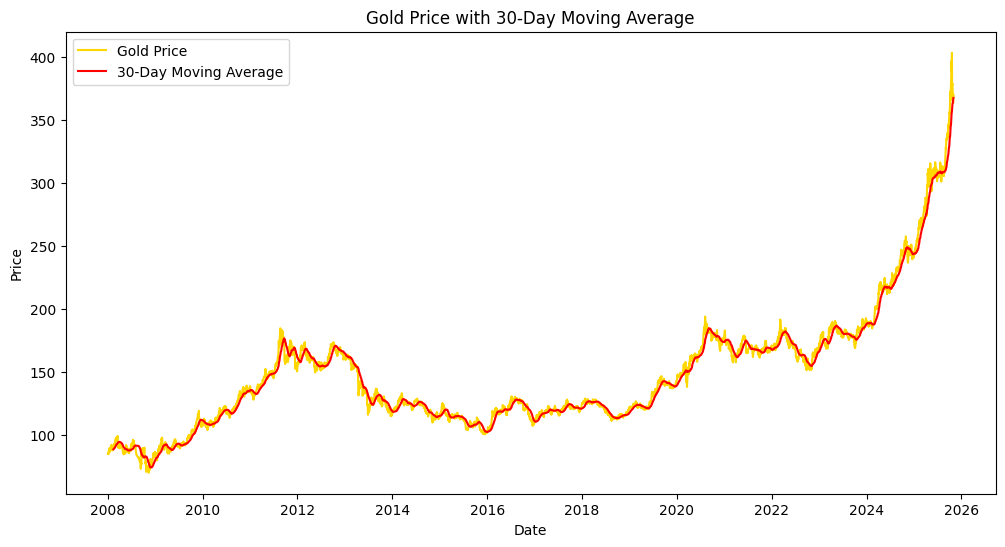

In [24]:
df_copy = df.copy()
# Moving Average for Trend Smoothing
df_copy['GLD_MA30'] = df_copy['GLD'].rolling(window=30).mean()  # 30-day moving average

plt.figure(figsize=(12,6))
plt.plot(df_copy['Date'], df_copy['GLD'], label='Gold Price', color='gold')
plt.plot(df_copy['Date'], df_copy['GLD_MA30'], label='30-Day Moving Average', color='red')
plt.title('Gold Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The graph titled **“Gold Price with 30-Day Moving Average”** shows the trend of gold prices (GLD) from 2008 to 2025, along with a smoothed 30-day moving average. The yellow line represents the actual daily gold prices, while the red line shows the moving average, which helps to reduce short-term fluctuations and highlight the overall trend. From the graph, it is evident that gold prices have experienced several cycles of rise and fall, with notable peaks around 2012 and sharp growth beginning after 2020. The 30-day moving average closely follows the actual prices, confirming a consistent upward momentum in recent years. Overall, the graph indicates a strong long-term **bullish trend** in gold prices, especially after 2023, reflecting growing market demand and economic influences.

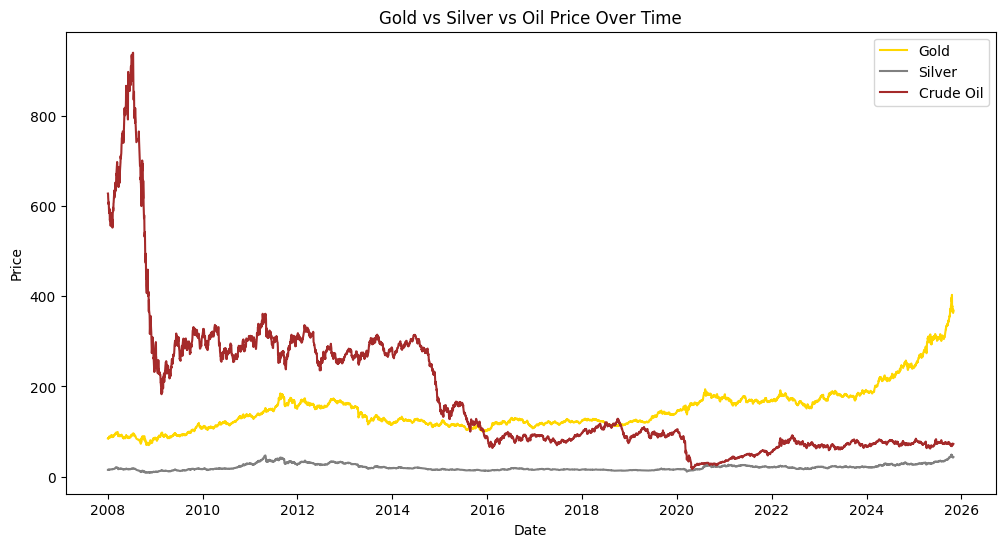

In [25]:
# Time Series Plot for Multiple Columns
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['GLD'], label='Gold', color='gold')
plt.plot(df['Date'], df['SLV'], label='Silver', color='gray')
plt.plot(df['Date'], df['USO'], label='Crude Oil', color='brown')
plt.title('Gold vs Silver vs Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The graph titled **“Gold vs Silver vs Oil Price Over Time”** compares the price trends of gold, silver, and crude oil from 2008 to 2025. The chart shows that **gold prices** (yellow line) have maintained a steady upward trend over the years, with a significant rise after 2020, indicating strong long-term growth and stability. **Silver prices** (gray line) have shown high volatility, with sharp fluctuations, especially around 2008–2012 and again after 2020, suggesting sensitivity to market changes. In contrast, **crude oil prices** (brown line) display large early spikes and deep declines, particularly around 2008 and 2015, followed by relatively stable but lower values in recent years. Overall, gold demonstrates consistent growth and serves as a stable investment asset, while silver and crude oil exhibit more unpredictable price movements influenced by market and economic factors.


### • Data Preprocessing

<h4> Select Columns to Detect Outliers </h4>

In [26]:
columns_to_check = ['GLD', 'USO', 'SLV']

<h4>Stepwise Outlier Removal Using IQR Method</h4>

In [27]:
# Create a copy to clean step by step
df_clean = df.copy()

for col in columns_to_check:
    # Calculate Q1, Q3, and IQR for the column
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier condition
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Show number of outliers in this column
    num_outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
    print(f"Column '{col}' has {num_outliers} outliers")
    
    # Remove outliers for this column only
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    # Show shape after removing outliers from this column
    print(f"Dataset shape after cleaning '{col}': {df_clean.shape}\n")

Column 'GLD' has 225 outliers
Dataset shape after cleaning 'GLD': (4238, 6)

Column 'USO' has 153 outliers
Dataset shape after cleaning 'USO': (4085, 6)

Column 'SLV' has 118 outliers
Dataset shape after cleaning 'SLV': (3967, 6)



<h4>Visualize Each Column Before & After Outliers</h4>

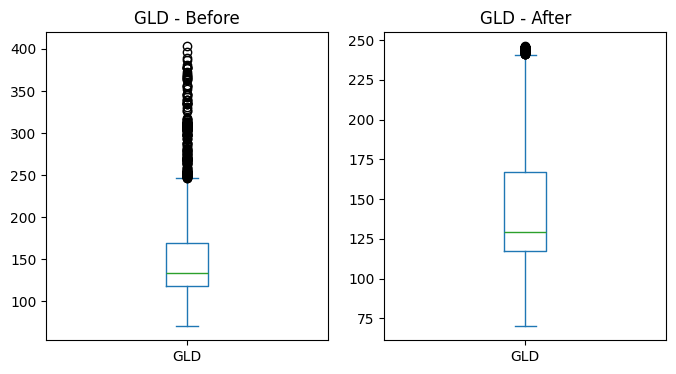

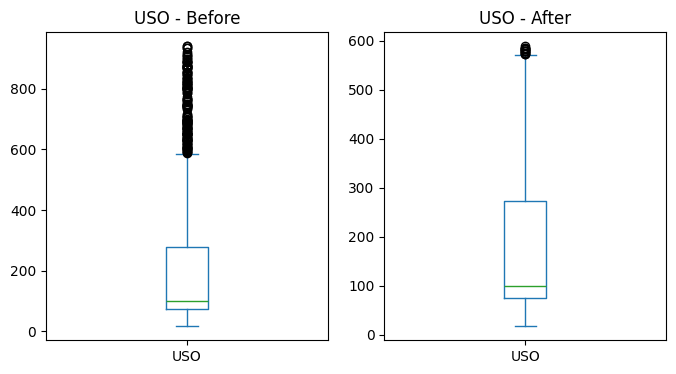

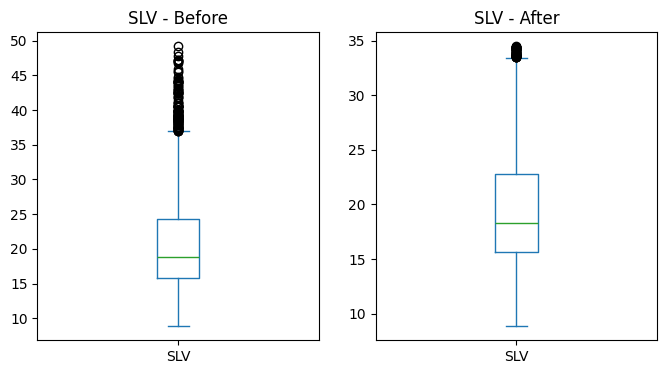

In [28]:
for col in columns_to_check:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    df[col].plot(kind='box', title=f"{col} - Before")
    
    plt.subplot(1,2,2)
    df_clean[col].plot(kind='box', title=f"{col} - After")
    plt.show()

The **boxplots** show that after cleaning, the extreme outliers in **GLD, USO, and SLV** have been significantly reduced. Each variable’s distribution appears more compact and balanced, indicating that the data cleaning process successfully removed abnormal high values, leading to a more stable and reliable dataset for further analysis or modeling.

### • Prepare & Splitting Data

In [29]:
X = df[['SLV', 'USO', 'SPX', 'EUR/USD']]
y = df['GLD']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### • Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### • Data Modeling by using RandomForestRegressor, LinearRigression, XGBoost Regressor

In [32]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [33]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [35]:
# XGBoost Regressor
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)  # XGBoost handles unscaled data
y_pred_xgb = xgb_model.predict(X_test)

### • Model Evaluation

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

mse_1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

mse_2 = mean_squared_error(y_test, y_pred_lr)
r2_2 = r2_score(y_test, y_pred_lr)

mse_3 = mean_squared_error(y_test, y_pred_xgb)
r2_3 = r2_score(y_test, y_pred_xgb)

print(f"MSE for RandomForestRegressor: {mse_1}, R²: {r2_1}")
print(f"MSE for LinearRegression: {mse_2}, R²: {r2_2}")
print(f"MSE for XGBoostRegressor: {mse_3}, R²: {r2_3}")

MSE for RandomForestRegressor: 15.43164809433453, R²: 0.9933081777807866
MSE for LinearRegression: 189.79561682827938, R²: 0.9176965079791399
MSE for XGBoostRegressor: 15.536398266991606, R²: 0.9932627536285141


### • Visualize Prediction vs Actual values

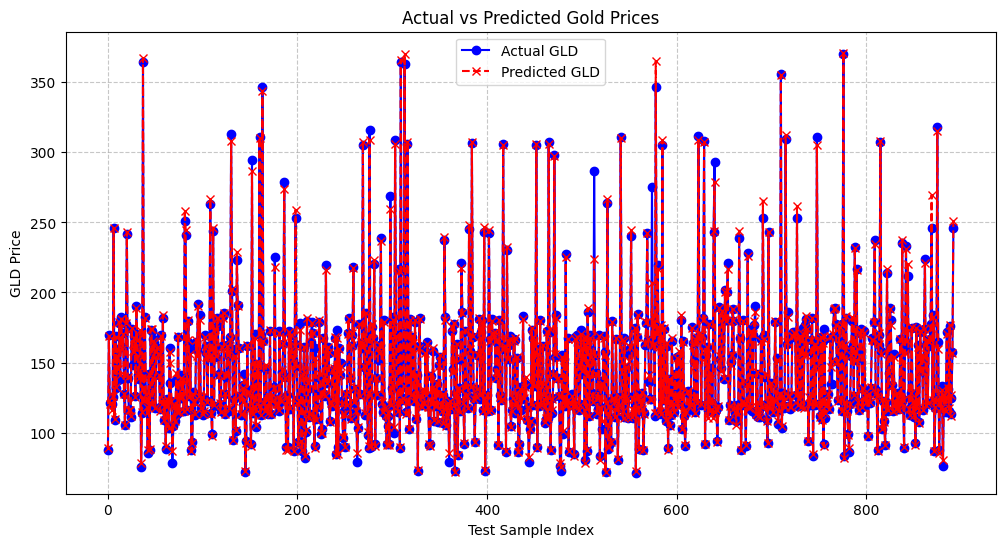

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual GLD', color='blue', marker='o')
plt.plot(y_pred, label='Predicted GLD', color='red', linestyle='--', marker='x')
plt.title("Actual vs Predicted Gold Prices")
plt.xlabel("Test Sample Index")
plt.ylabel("GLD Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The graph shows that the **predicted GLD prices closely follow the actual GLD prices**, indicating that the **model performs well in capturing the overall trend and movement of gold prices**. Although there are some minor deviations at certain points, the **strong overlap between both lines suggests good predictive accuracy and reliable model performance**.


In [38]:
# R² score for training data
r2_train = r2_score(y_train, model.predict(X_train_scaled))
print(r2_train)

0.9994246805308893


The R² score of **0.9994** indicates that the model explains **nearly all (99.94%) of the variance** in the training data. This means the model fits the training data extremely well, showing very high predictive power. However, such a high score may also suggest **possible overfitting**, so it’s important to compare it with the R² score on the test data to confirm the model’s generalization performance.


In [39]:
# R² score for test data
r2_test = r2_score(y_test, model.predict(X_test_scaled))
print(r2_test)

0.9933081777807866


### • Model Deployment

In [40]:
import pickle

# Example assuming your mode variable is named 'model'
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# If you used a scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)